In [1]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt



!rm *.csv  #It is used to delete the uploaded .csv files

rm: cannot remove '*.csv': No such file or directory


In [0]:
from google.colab import files
uploaded = files.upload()
uploaded1 = files.upload()

#Browse to the folder where"cleanTitanicTest.csv" and "cleanTitanicTrain.csv" are located

Saving cleanTitanicTest.csv to cleanTitanicTest.csv


Saving cleanTitanicTrain.csv to cleanTitanicTrain.csv


In [0]:
import io
titanicTest = pd.read_csv(io.BytesIO(uploaded['cleanTitanicTest.csv']))
len(titanicTest)

418

In [0]:
import io
titanicTrain = pd.read_csv(io.BytesIO(uploaded1['cleanTitanicTrain.csv']))
len(titanicTrain)

891

In [0]:
predictorNames= ["Pclass", "Sex", "Age", "SibSp","Parch", "Fare", "Embarked"] 

trainPredictors = titanicTrain[predictorNames]

targetName=['Survived']
trainTarget = titanicTrain['Survived']
testPredictors = titanicTest[predictorNames]

In [0]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
logReg = LogisticRegression()

bagging_scores = np.zeros((10,7))

for s in range(0,10):
  samples=1/(s+1)
  for f in range (0,7):
    features =1/(f+1)
    bagging = BaggingClassifier(logReg, max_samples=samples,
                                max_features = features)
    bagging.fit(trainPredictors, trainTarget)
    bagging_scores[s,f]=round(bagging.score(trainPredictors, trainTarget)*100,2)
    

    
   

IndentationError: ignored

In [0]:
 from tabulate import tabulate
    
 table = tabulate(bagging_scores, tablefmt="fancy_grid")
 print(table)

╒═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│ 80.25 │ 79.91 │ 70.48 │ 69.92 │ 70.82 │ 66.11 │ 61.73 │
├───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 80.92 │ 79.12 │ 64.87 │ 64.2  │ 65.66 │ 66.11 │ 61.84 │
├───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 79.8  │ 71.49 │ 78.68 │ 70.48 │ 61.62 │ 70.15 │ 68.46 │
├───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 79.24 │ 79.91 │ 75.2  │ 78.79 │ 61.62 │ 63.08 │ 68.91 │
├───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 80.13 │ 72.17 │ 69.36 │ 63.52 │ 63.08 │ 69.47 │ 70.03 │
├───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 80.58 │ 79.35 │ 73.74 │ 63.41 │ 62.29 │ 70.26 │ 62.29 │
├───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 79.91 │ 71.72 │ 68.69 │ 62.51 │ 61.73 │ 63.75 │ 71.49 │
├───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 79.91 │ 79.69 │ 70.15 │ 63.3  │ 66.22 │ 64.42 │ 66.55 │
├───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 80.81 │ 80.2

In [0]:
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

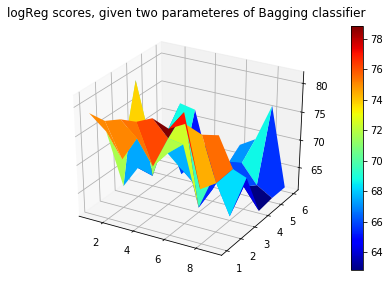

In [0]:
import numpy as np
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
x = np.arange(1,10,1)
y=np.arange(1,7,1)
x,y = np.meshgrid(x,y)

z=np.array(bagging_scores[x,y])
surf = ax.plot_surface(x,y,z, rstride=1, cstride=1,cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
title = ax.set_title('logReg scores, given two parameteres of Bagging classifier')
title.set_y(1.01)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))

fig.tight_layout()
fig.savefig('3D-constructing-{}.png'.format(1))



KNN Models using Bagging

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


import numpy as np
from sklearn.ensemble import BaggingClassifier
knn = KNeighborsClassifier(n_neighbors=2)

bagging_scores = np.zeros((10,7))
for s in range(0,10):
  samples=1/(s+1)
  for f in range (0,7):
    features =1/(f+1)
    bagging = BaggingClassifier(knn, max_samples=samples,
                                max_features = features)
    bagging.fit(trainPredictors, trainTarget)
    bagging_scores[s,f]=round( bagging.score(trainPredictors, trainTarget)*100,2)
    


NameError: ignored

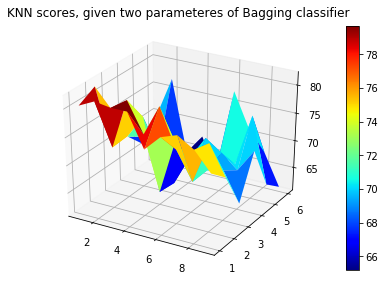

In [0]:
fig=plt.figure()

ax=fig.add_subplot(111, projection='3d')
x = np.arange(1,10,1)
y = np.arange(1,7,1)
x,y = np.meshgrid(x,y)

z=np.array(bagging_scores[x,y])
surf = ax.plot_surface(x,y,z, rstride=1, cstride=1,cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
title = ax.set_title('KNN scores, given two parameteres of Bagging classifier')
title.set_y(1.01)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))
fig.tight_layout()
fig.savefig('3D-constructing-{}.png'.format(1))

